## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc



Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 22.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [2]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')

df.head() #variable names hard/annoying to type over again - create dummy vectors

df['price'] = df['Price']
df['beds'] = df['Beds']
df['reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

X = df.loc[:,['price', 'beds', 'reviews', 'score']]

print(X.shape) #describes and gives shape of just these renames varibales - price isnt given here, must not be numeric
X.describe()

(30478, 4)


,beds,reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [16]:
#price
X['price'].value_counts()

#clean price - need to replace the commas and make tham ass numeric integers

X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')
X.describe() # we can now see that price is included in the stats as numeric values

,price,beds,reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [18]:
#beds
X['beds'].unique() # has nan values
X['beds'] = X['beds'].fillna(1)
X.describe() #filling the nans with a 1 barely changed the stats since they were replaced with the mean value

,price,beds,reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [19]:
#reviews

X['reviews'].unique() # seems to all be integers, no nan values, it is clean!

array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [21]:
#scores

X['score'].unique() #there are nan values - need to see how many
pd.crosstab(df['score'].isnull(), df['reviews']>0)

#this shows us that there are 509 missing values due to nan, and 7814 missing values because there are simply no reviews for that property - going to drop these to keep it simple


reviews,False,True
score,,
False,0,22155
True,7814,509


In [22]:
#dropping nan values
X = X.dropna()
X.describe()

,price,beds,reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [23]:
#2: maxmin normalize the data, cant have nans

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = X.drop('price',axis=1)
Z = Z.apply(maxmin)

In [24]:
#3: use KMeans to cluster data by beds, reviews, and scores for k=6

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) #creates the model
model = model.fit(Z) #fits the model
Z['cluster'] = model.labels_

In [25]:
Z.describe()

,beds,reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


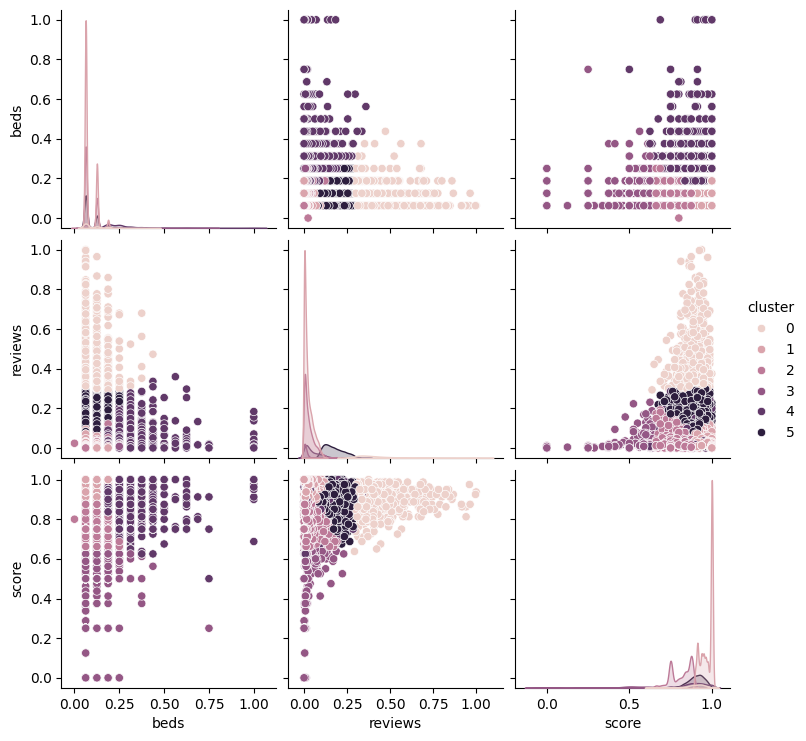

In [26]:
#4: use seaborn pairplot to make a grid of scatterplots that show how clustering is carried in multiple dimensions

import seaborn as sns
sns.pairplot(data=Z, hue='cluster')

In [27]:
#5: use groupby to compute average price for each cluster - which clusters have the highest rental prices
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()



price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

It is seen that cluster 4 has the highest rental price of 300/night while the other clusters are not even close to 200/night. The next closest rental price is cluster 1 with 152/night.

Text(0.5, 1.0, 'Scree Plot')

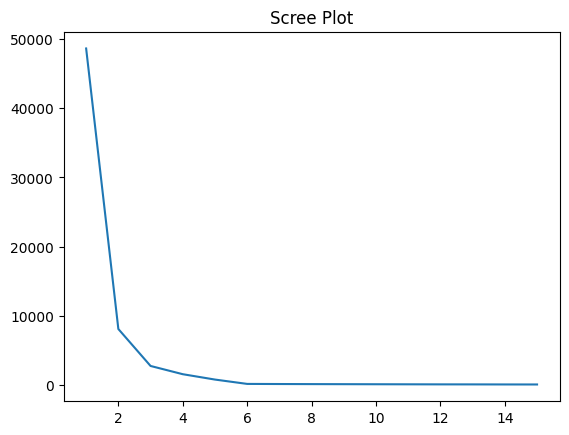

In [28]:
#6: use skree plot to pick the number of clusters and repeat steps 4 and 5

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') #makes the skree plot

Use a k value of 3.

price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0        11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00  10000.0
1         4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   4500.0
2         6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   5000.0

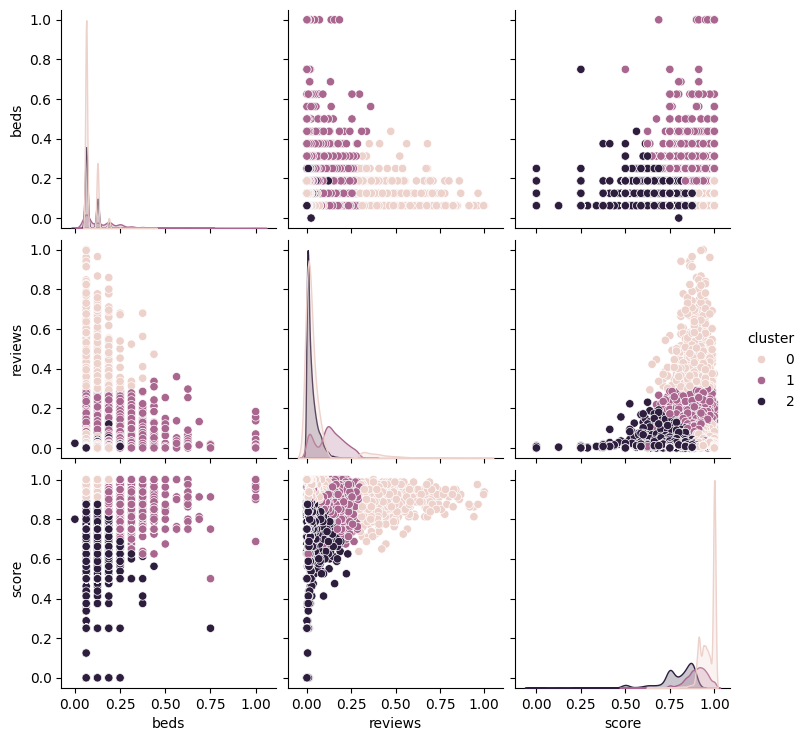

In [29]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) #using 3 clusters this time
model = model.fit(Z)
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [33]:
#1: run the code

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

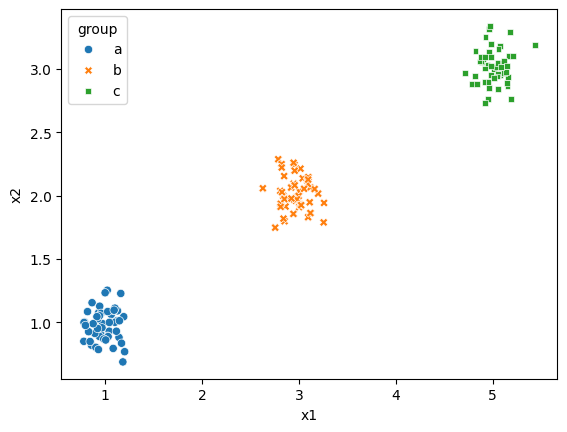

In [34]:
#2: make scatterplots od X1, X1 points by group for the datasets - as noise increases what happens to the visual distinctness of the clusters

sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

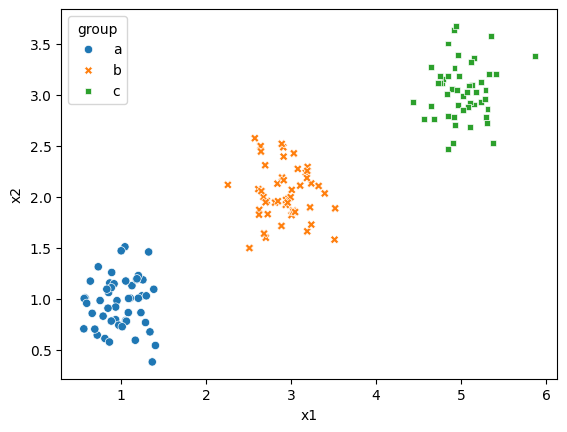

In [35]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

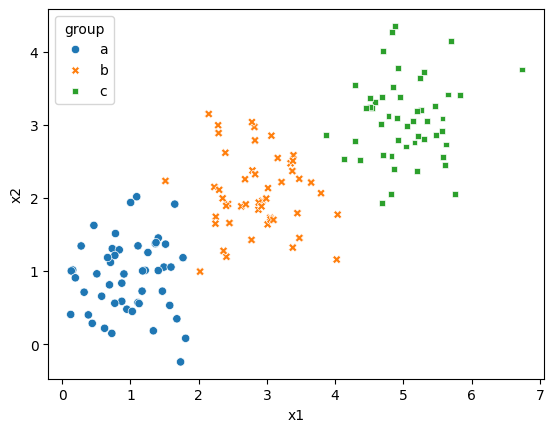

In [36]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

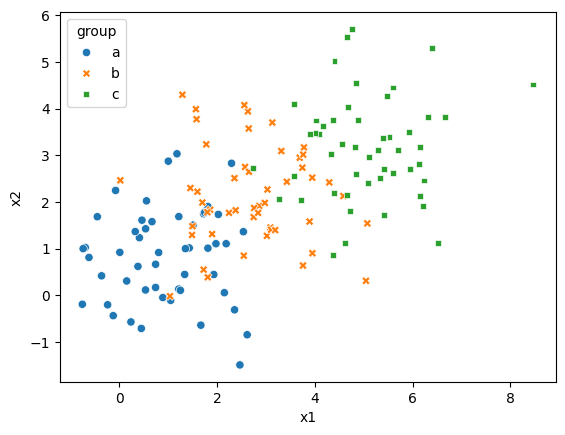

In [37]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

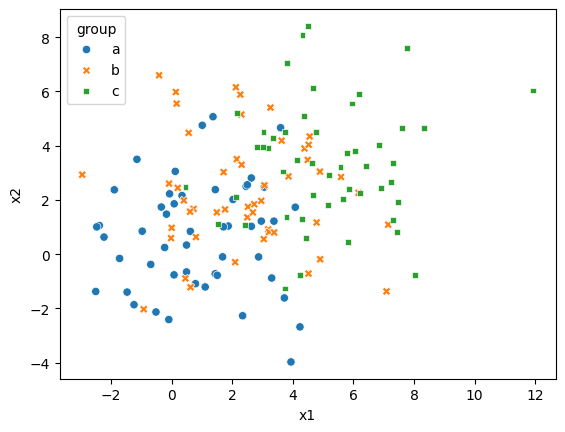

In [38]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise increases, it is clear the the clusters spread out away from each other and then collide. When the noise is 2, it is extrememly unclear where the division between clusters is and which cluster a point belongs to. Between 0.5 and 1, the noise becomes to much to distinguish between clusters.

In [39]:
#3: create scree plot - describe how the level of noise affects the plots and how to select a k

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data): #quick pre built function
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

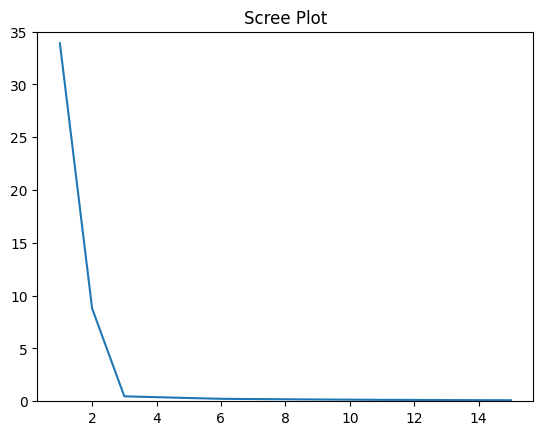

In [41]:
scree(data=df0_125)

clear elbow at k=3

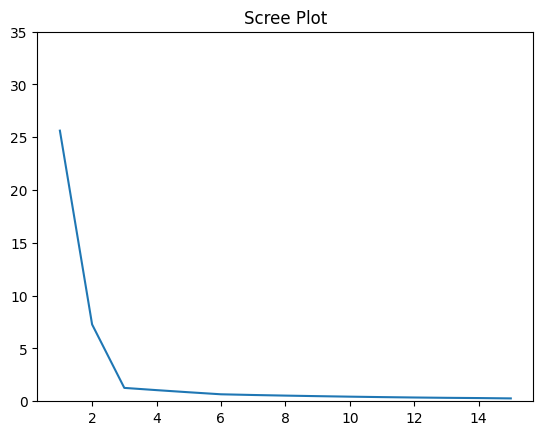

In [42]:
scree(data=df0_25)

still a clear elbow at k=3

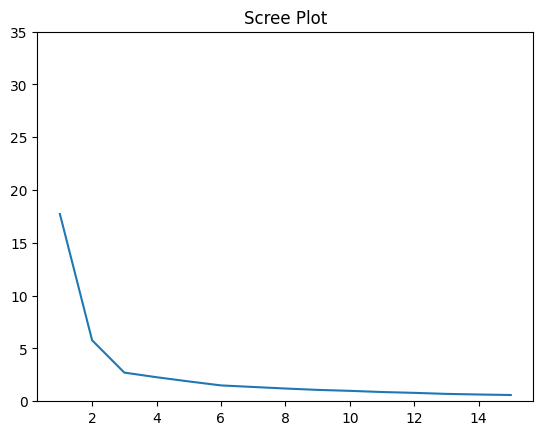

In [43]:
scree(data=df0_5)

still a clear elbow at k=3

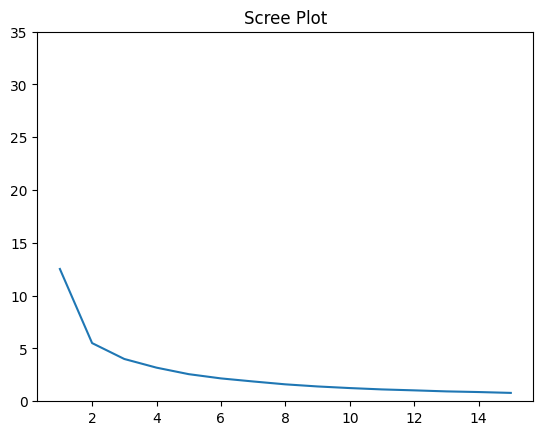

In [44]:
scree(df1_0)

elbow at k=2, less clear

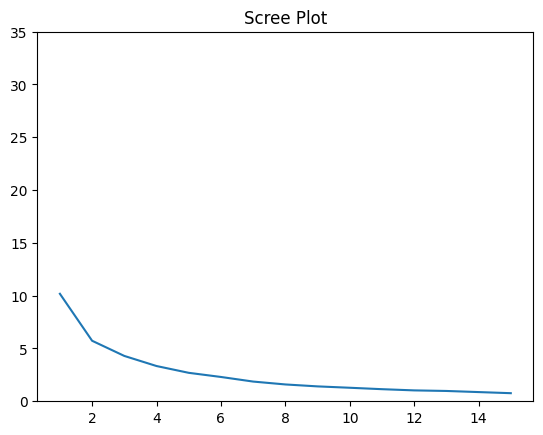

In [45]:
scree(df2_0)

no clear elbow present

4. Explain the intuition of an elbow using the simulation.

When groups are clearly distinct, an additonal cluster adds a clear benefit. This is seen in the model with a large drop in SSE. When groups are greatly overlapped, it is very difficult to determine how many groups there ideally should be and it is hard to tell which group an individual point will belong to. If clusters are seperated and distinct, the scree plot will show an elbow, showing that that is where the k value will give clear and separate plots.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?